In [1]:
import pandas as pd

# Reading a TSV file
df = pd.read_csv('/content/Restaurant_Reviews.tsv', delimiter='\t')

# Reading a CSV file
# df = pd.read_csv('your_file.csv')  # Use this for CSV files


In [5]:
# Display the first few rows of the dataset
df.head()

,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1


In [4]:
df.describe()

,Liked
count,1000.00000
mean,0.50000
std,0.50025
min,0.00000
25%,0.00000
50%,0.50000
75%,1.00000
max,1.00000


from matplotlib import pyplot as plt
_df_0['Liked'].plot(kind='hist', bins=20, title='Liked')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['Liked'].plot(kind='line', figsize=(8, 4), title='Liked')
plt.gca().spines[['top', 'right']].set_visible(False)

In [14]:
df.columns

Index(['Review', 'Liked'], dtype='object')

In [6]:
#Checking is there any null value or not
df.isnull().sum()

Review    0
Liked     0
dtype: int64

In [7]:
pip install pandas nltk wordcloud matplotlib


In [8]:
import nltk
nltk.download('vader_lexicon')


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

In [15]:

# Perform sentiment analysis (using NLTK for simplicity)
from nltk.sentiment import SentimentIntensityAnalyzer

sia = SentimentIntensityAnalyzer()
df['Sentiment'] = df['Review'].apply(lambda x: sia.polarity_scores(x)['compound'])


In [18]:
# Display the sentiment analysis results
df[['Review','Sentiment']].head()




,Review,Sentiment
0,Wow... Loved this place.,0.5994
1,Crust is not good.,-0.3412
2,Not tasty and the texture was just nasty.,-0.5574
3,Stopped by during the late May bank holiday of...,0.6908
4,The selection on the menu was great and so wer...,0.6249


In [21]:
df[['Review','Sentiment']].sample(10)

,Review,Sentiment
969,I don't know what the big deal is about this p...,0.0000
674,Awesome service and food.,0.6249
30,"Also there are combos like a burger, fries, an...",0.3612
830,Do yourself a favor and stay away from this dish.,0.4019
454,The last 3 times I had lunch here has been bad.,-0.5423
262,The restaurant atmosphere was exquisite.,0.0000
486,They had a toro tartare with a cavier that was...,0.4215
408,Service was fantastic.,0.5574
418,First time going but I think I will quickly be...,0.0000
448,"The food is delicious and just spicy enough, s...",0.7414


In [22]:
# Explore reviews by rating
rating_counts = df['Liked'].value_counts()
print("Review counts by rating:\n", rating_counts)


Review counts by rating:
 1    500
0    500
Name: Liked, dtype: int64


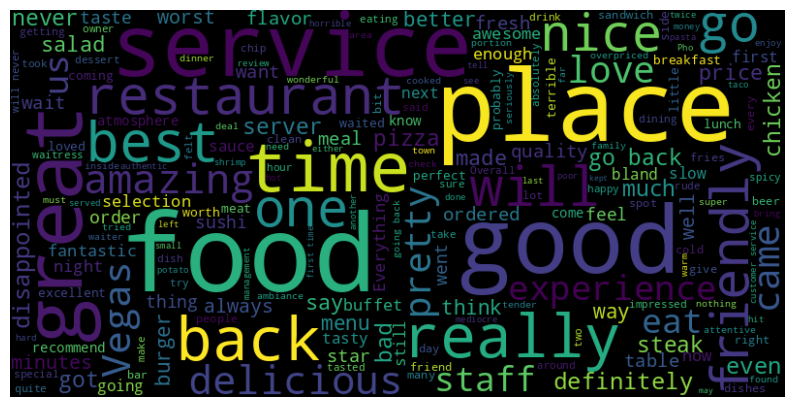

In [24]:

# Explore reviews by location
# location_counts = df['Location'].value_counts()
# print("Review counts by location:\n", location_counts)


# Word cloud for most frequent words in reviews
from wordcloud import WordCloud
import matplotlib.pyplot as plt

text = ' '.join(df['Review'].dropna())
wordcloud = WordCloud(width=800, height=400, random_state=21, max_font_size=110).generate(text)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()


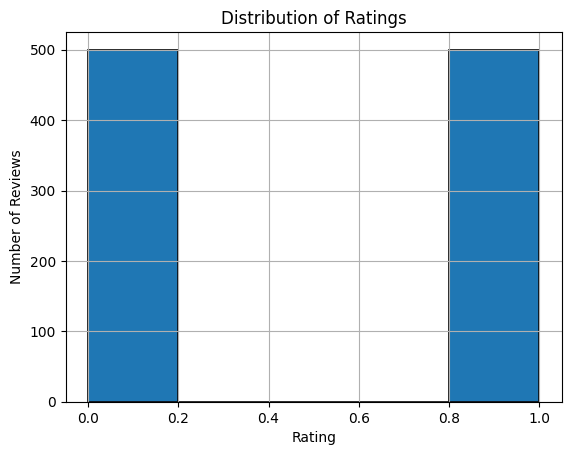

In [26]:
# Histogram of Ratings
df['Liked'].hist(bins=5, edgecolor='black', linewidth=1.2)
plt.xlabel('Rating')
plt.ylabel('Number of Reviews')
plt.title('Distribution of Ratings')
plt.show()


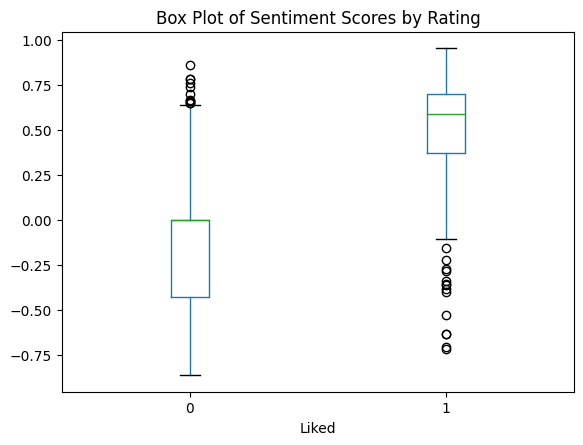

In [27]:
# Box Plot of Sentiment Scores
df.boxplot(column='Sentiment', by='Liked', grid=False)
plt.title('Box Plot of Sentiment Scores by Rating')
plt.suptitle('')  # Remove default title
plt.show()


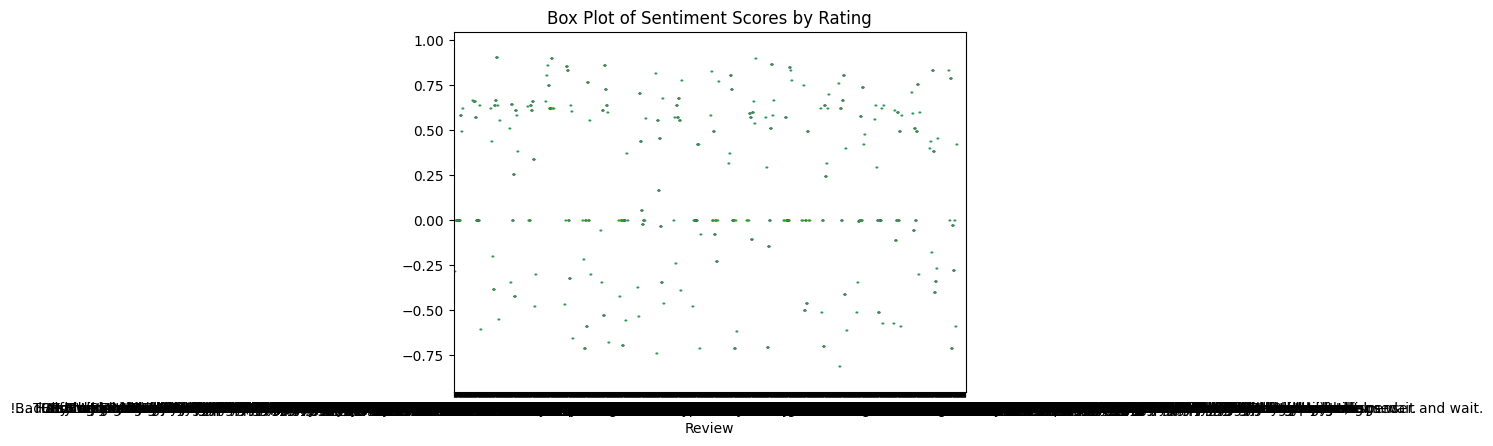

In [28]:
# Box Plot of Sentiment Scores
df.boxplot(column='Sentiment', by='Review', grid=False)
plt.title('Box Plot of Sentiment Scores by Rating')
plt.suptitle('')  # Remove default title
plt.show()


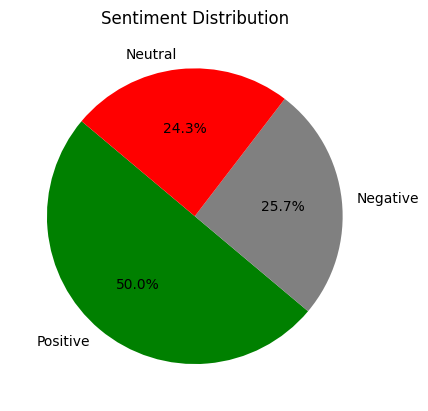

In [29]:
# Pie Chart of Sentiment Distribution
sentiment_distribution = df['Sentiment'].apply(lambda x: 'Positive' if x > 0 else ('Neutral' if x == 0 else 'Negative'))
sentiment_counts = sentiment_distribution.value_counts()
plt.pie(sentiment_counts, labels=sentiment_counts.index, autopct='%1.1f%%', startangle=140, colors=['green', 'gray', 'red'])
plt.title('Sentiment Distribution')
plt.show()


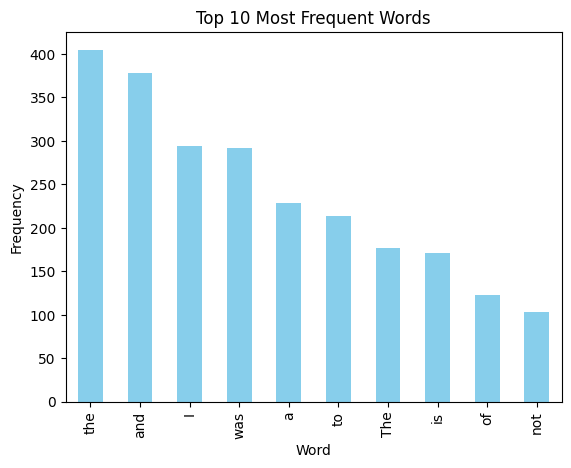

In [30]:
# Bar Chart of Top N Words
top_words = pd.Series(text.split()).value_counts().head(10)
top_words.plot(kind='bar', color='skyblue')
plt.xlabel('Word')
plt.ylabel('Frequency')
plt.title('Top 10 Most Frequent Words')
plt.show()


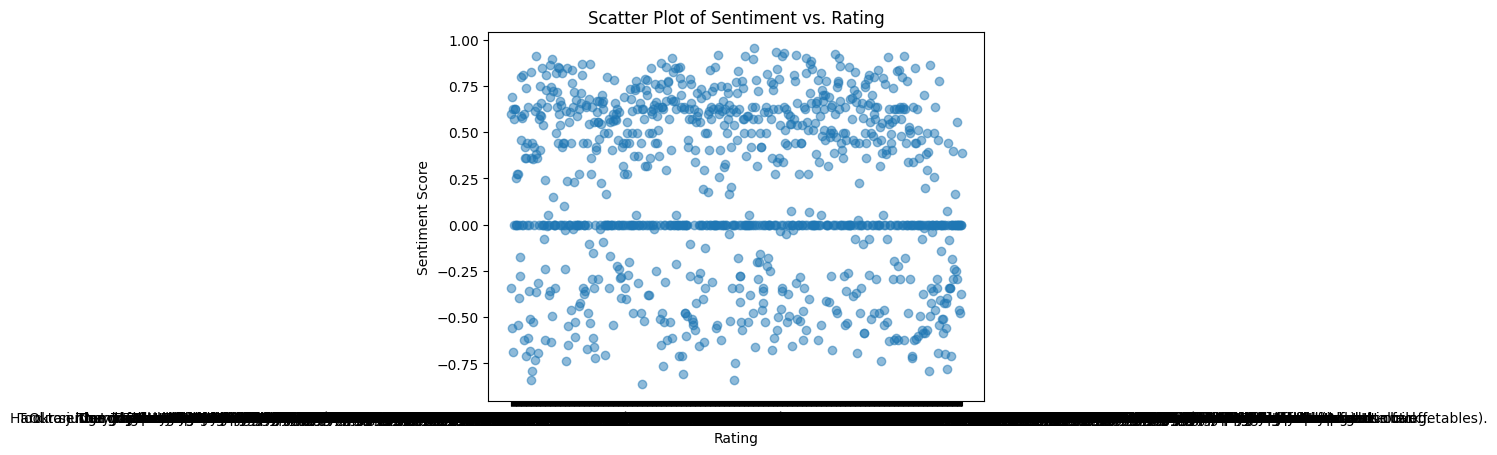

In [32]:
# Scatter Plot of Sentiment vs. Rating
plt.scatter(df['Review'], df['Sentiment'], alpha=0.5)
plt.xlabel('Rating')
plt.ylabel('Sentiment Score')
plt.title('Scatter Plot of Sentiment vs. Rating')
plt.show()


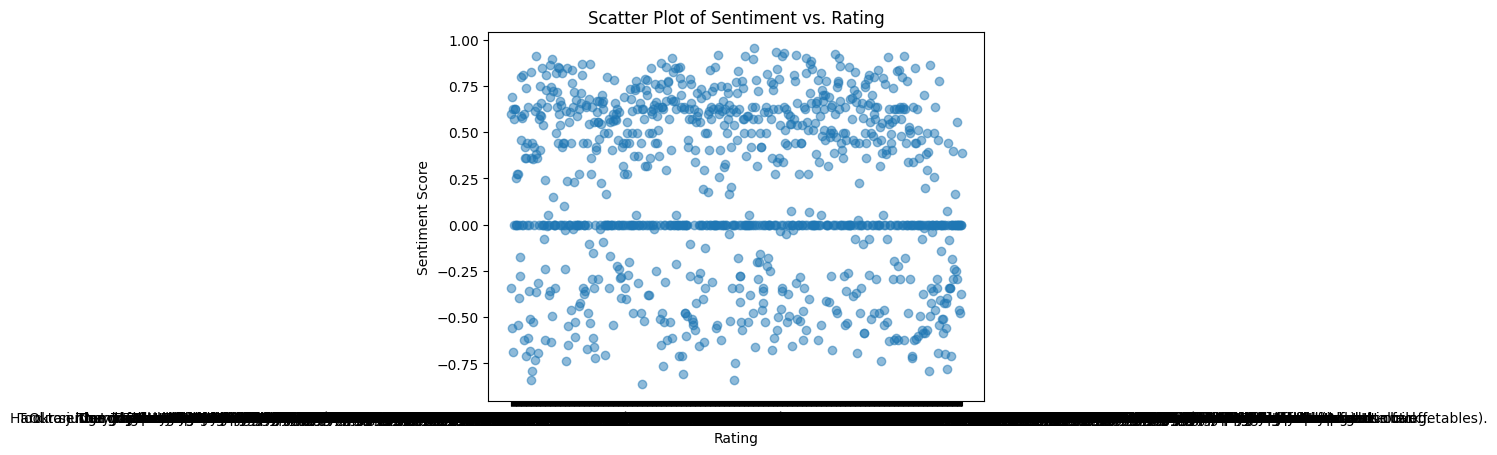

In [33]:
# Scatter Plot of Sentiment vs. Liked
plt.scatter(df['Review'], df['Sentiment'], alpha=0.5)
plt.xlabel('Rating')
plt.ylabel('Sentiment Score')
plt.title('Scatter Plot of Sentiment vs. Rating')
plt.show()


In [34]:
pip install spacy


In [35]:
python -m spacy download en_core_web_sm


SyntaxError: ignored

In [36]:
import spacy
spacy.cli.download("en_core_web_sm")


✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


**This code uses spaCy to extract named entities (organizations, locations, and persons) from the reviews and creates a bar chart of the top 10 entities. Adjust the entity types and visualization as needed based on your specific goals.t**

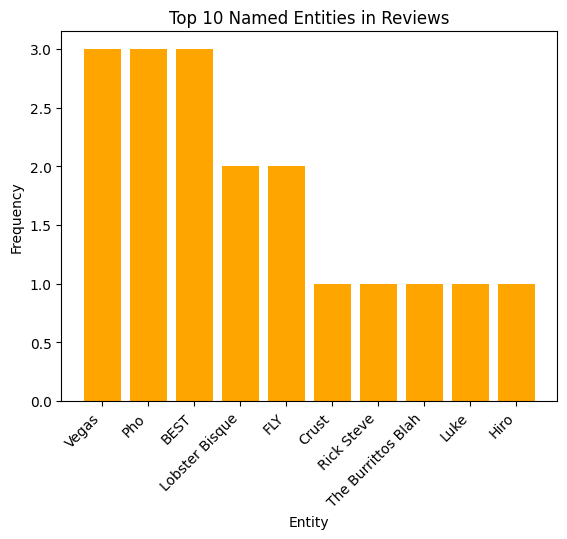

In [38]:
import pandas as pd
import spacy
from collections import Counter
import matplotlib.pyplot as plt

# Load spaCy English language model
nlp = spacy.load('en_core_web_sm')

# Load the dataset
df = pd.read_csv('/content/Restaurant_Reviews.tsv', delimiter='\t')
# df = pd.read_csv('restaurant_reviews.csv')  # Replace with your actual file path

# Process each review text using spaCy
all_entities = []
for review_text in df['Review'].dropna():
    doc = nlp(review_text)
    entities = [ent.text for ent in doc.ents if ent.label_ in ['ORG', 'LOC', 'PERSON']]
    all_entities.extend(entities)

# Count the occurrences of each entity
entity_counts = Counter(all_entities)

# Bar Chart of Top N Entities
top_entities = dict(entity_counts.most_common(10))
plt.bar(top_entities.keys(), top_entities.values(), color='orange')
plt.xlabel('Entity')
plt.ylabel('Frequency')
plt.title('Top 10 Named Entities in Reviews')
plt.xticks(rotation=45, ha='right')
plt.show()


In [41]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [42]:
df['Tokens'] = df['Review'].apply(word_tokenize)

# Flatten the list of tokens and calculate frequency distribution
all_tokens = [token for tokens in df['Tokens'].dropna() for token in tokens]
freq_dist = FreqDist(all_tokens)

# Print the most common words
print("Most Common Words:")
for word, frequency in freq_dist.most_common(10):
    print(f"{word}: {frequency}")

Most Common Words:
.: 823
the: 406
and: 382
,: 366
I: 347
was: 308
!: 251
a: 228
to: 216
The: 178


In [43]:
import spacy
from collections import Counter

# Load spaCy English language model
nlp = spacy.load('en_core_web_sm')

# Process each review text using spaCy and get lemmatized tokens
all_lemmas = [lemma.text.lower() for doc in nlp.pipe(df['Review'].dropna()) for lemma in doc if lemma.is_alpha and not lemma.is_stop]

# Calculate the frequency distribution of lemmatized tokens
lemma_freq_dist = Counter(all_lemmas)

# Print the frequencies of all words
for lemma, frequency in lemma_freq_dist.most_common(10):
    print(f"{lemma}: {frequency}")


food: 126
place: 106
good: 95
service: 85
great: 70
like: 46
time: 42
best: 30
friendly: 27
restaurant: 25


In [46]:
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer

# Download the VADER lexicon
nltk.download('vader_lexicon')

# Initialize the VADER SentimentIntensityAnalyzer
sia = SentimentIntensityAnalyzer()

# Calculate sentiment scores for each review
df['Sentiment'] = df['Review'].apply(lambda x: sia.polarity_scores(x)['compound'])

# Classify reviews as positive, negative, or neutral based on the sentiment score
df['Sentiment_Label'] = df['Sentiment'].apply(lambda x: 'Positive' if x > 0 else ('Neutral' if x == 0 else 'Negative'))

# Print the first few rows of the dataset with sentiment labels
print(df[['Review', 'Sentiment_Label']].head())


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


                                              Review Sentiment_Label
0                           Wow... Loved this place.        Positive
1                                 Crust is not good.        Negative
2          Not tasty and the texture was just nasty.        Negative
3  Stopped by during the late May bank holiday of...        Positive
4  The selection on the menu was great and so wer...        Positive


In [48]:
import pandas as pd
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer

# Sample DataFrame, replace with your actual data
data = {'Review': ["food", "place", "service", "time"]}
df = pd.DataFrame(data)

# Download the VADER lexicon
nltk.download('vader_lexicon')

# Initialize the VADER SentimentIntensityAnalyzer
sia = SentimentIntensityAnalyzer()

# Calculate sentiment scores for each review
df['Sentiment'] = df['Review'].apply(lambda x: sia.polarity_scores(x)['compound'])

# Classify reviews as positive, negative, or neutral based on the sentiment score
df['Sentiment_Label'] = df['Sentiment'].apply(lambda x: 'Positive' if x > 0 else ('Neutral' if x == 0 else 'Negative'))

# Count the occurrences of each sentiment label
sentiment_counts = df['Sentiment_Label'].value_counts()

# Create a new DataFrame with sentiment labels and their counts
sentiment_df = pd.DataFrame(sentiment_counts.items(), columns=['Sentiment_Label', 'Count'])

# Print the resulting DataFrame
print(sentiment_df)


  Sentiment_Label  Count
0         Neutral      4


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
